## Logistic Regression – Using More Intuitive Feature Selection for Easier Interpretation

In this step, I’m transitioning from the EDA phase into building a logistic regression model.  
Instead of using the full one-hot encoded dataset with 50+ features, I’m intentionally **selecting a smaller, more interpretable set of features** that are both relevant and easier to explain in terms of their relationship to the target variable (`y`).

**Rationale for this approach:**
- **Interpretability:** A smaller set of features makes it easier to understand how each variable influences the prediction.
- **Simplicity:** Reduces complexity and multicollinearity issues that can occur with many dummy variables.
- **Focus on meaningful predictors:** Using variables that have clear business or contextual meaning.

**Features selected:**
- `age` – Age of the individual.
- `previous` – Number of previous contacts with the client.
- `emp.var.rate` – Employment variation rate.
- `cons.price.idx` – Consumer price index.
- `cons.conf.idx` – Consumer confidence index.
- `euribor3m` – 3-month Euribor interest rate.
- `nr.employed` – Number of employees.
- `prior_contact` – Binary flag if the client had been previously contacted.
- `campaign_capped` – Number of contacts made during the current campaign (capped).

**Target variable:**
- `y` – Binary outcome indicating if the client subscribed to the term deposit (1) or not (0).

**Next steps:**
1. Split data into training and testing sets.
2. Scale numeric features for logistic regression.
3. Train the model.
4. Evaluate performance (accuracy, classification report, confusion matrix).
5. Optionally, interpret coefficients to understand feature importance.


In [1]:
#lets first import pandas and read from the cleaned dataset
import pandas as pd


df = pd.read_csv('cleaned_bank.csv')

1.Feature selection (My reduced intuitive feature list).

2.Train/test split.

3.Scaling.

4.Model fitting.

5.Evaluation.

1.) Feature Selection

In [2]:
#Feature selection for logistic regression
#We will use the following features for our logistic regression model:
#1. age, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

features_to_keep = [
    'age',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    'prior_contact',
    'campaign_capped'
]




### Feature Selection for Logistic Regression

In this step, we define the set of features that will be used as inputs for our logistic regression model.  
The selected features are chosen because they capture key aspects of the client’s profile, economic indicators,  
and campaign history that may influence the outcome.

**Selected Features:**
1. **age** – Age of the client.  
2. **previous** – Number of previous contacts with the client.  
3. **emp.var.rate** – Employment variation rate (economic indicator).  
4. **cons.price.idx** – Consumer price index.  
5. **cons.conf.idx** – Consumer confidence index.  
6. **euribor3m** – Euribor 3-month rate (financial indicator).  
7. **nr.employed** – Number of employees (macro-level economic indicator).  
8. **prior_contact** – Indicates whether the client was contacted previously in the campaign.  
9. **campaign_capped** – A capped version of the campaign variable to limit outliers in contact attempts.  


In [3]:
#keep only selected features compare against the target variable 'y'
X = df[features_to_keep].copy () # Features for the model
y = df['y'].astype(int)  # Convert target variable to integer (0 or 1)

#type(X), type(y)
# ensure binary columns are ints (0/1) not bool/object
X[['prior_contact', 'campaign_capped']] = X[['prior_contact', 'campaign_capped']].astype('category')

### Preparing Features and Target Variable for Logistic Regression

After selecting the features, the next step is to separate the input variables (**X**) and the target variable (**y**) to train our logistic regression model.

**Steps:**
1. **Select Features (X):**  
   - `X = df[features_to_keep].copy()` creates a new dataframe containing only the chosen features.  
   - This prevents accidental changes to the original dataframe while modeling.  

2. **Define Target (y):**  
   - `y = df['y'].astype(int)` extracts the target column (`y`) and converts it to integers (0 or 1).  
   - This ensures the target is properly formatted for binary classification.  

3. **Ensure Correct Data Types for Binary Features:**  
   - `X[['prior_contact', 'campaign_capped']] = ... .astype('category')`  
   - Converts these features into categorical variables (instead of boolean or object).  
   - This helps the model and preprocessing pipelines treat them correctly.  


Identify Column Types
Identify which columns are numeric and which are categorical

In [4]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)
print('target variable:', y.name + ' 0 or 1:', y.dtype)


Numeric columns: ['age', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical columns: ['prior_contact', 'campaign_capped']
target variable: y 0 or 1: int32


2.) Train/test split.

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# test size 20% of rows go to test set, 80% to train set
# random_state ensures reproducibility of the split
# stratify ensures that the proportion of classes in y is maintained in both train and test sets


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

#
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31462, 9) (7866, 9) (31462,) (7866,)


**Train/Test Split — Output Summary**
-------------------------------------

**X_train**: feature matrix used to train the model (rows = training examples, cols = features).  
**y_train**: target labels for those training examples.  
**X_test**: feature matrix held out for evaluating the trained model.  
**y_test**: true labels for the test rows used only to measure performance.  

---

### 🔑 Key differences and why they matter
- **Purpose:**  
  - `X_train` / `y_train` → learn model parameters.  
  - `X_test` / `y_test` → assess how the learned model generalizes to unseen data.  

---

### 📊 What the Output Means
- `X_train` → 31,462 rows × 9 features (80% of the data)  
- `X_test`  →  7,866 rows × 9 features (20% of the data)  
- `y_train` → 31,462 labels (matches X_train rows)  
- `y_test`  →  7,866 labels (matches X_test rows)  

---

### 🧮 Why the Numbers Make Sense
- **Total rows:**  
  31,462 + 7,866 = 39,328 total rows in dataset.  

- **80/20 split check:**  
  - Train: 39,328 × 0.8 ≈ 31,462  ✅  
  - Test:  39,328 × 0.2 ≈  7,866  ✅  

- **Same features in train/test:**  
  Both X_train and X_test have exactly 9 columns (features).  


Now I need to scale continous features, fit logistic regression on X_train/y_train

3.) Scaling

In [6]:
#Now lets do some preprocessing of the data
#Preprocessing is important for machine learning models to ensure that the data is in the right format
#Preprocessing = cleaning, imputing, encoding, scaling, etc.
#Typical steps, 1.) train test split, 2.) categorical encoding, 3.) scaling, 4.) model training

#We already did the train test split above, now we will do categorical encoding and scaling
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#time to do one-hot encoding for categorical features
preprocessor = ColumnTransformer (

    transformers = [
        ('num', StandardScaler(), numeric_cols),  # Scale numeric columns
        
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols) # One-hot encode categorical columns, ignore unknown categories during transformation
    ]
    , remainder='passthrough'  # Keep numeric columns as they are
)

#Now we do a pipeline to combine preprocessing with the model
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),  # Preprocessing step
    ('clf', LogisticRegression(class_weight = 'balanced',max_iter=1000))  # Logistic Regression model, balannced class weights to handle class imbalance

])

Pipeline: chains preprocessing steps and a final estimator so you call fit/transform/predict once. It guarantees transforms are applied in the correct order and prevents data leakage (you fit transforms only on X_train).

ColumnTransformer: applies different transforms to different column subsets (e.g., scale numeric, one-hot encode categorical) and returns a single feature matrix the estimator can use.

Benefits: simpler code, fewer mistakes (no manual concat/typos), reproducible transforms saved with the model, and safe train/test separation.

4.) Fit Model

In [7]:
#now I need to fit the model to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['prior_contact',
                                                   'campaign_capped'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

### Understanding `pipeline.fit(X_train, y_train)`

When you call `pipeline.fit(X_train, y_train)`, scikit-learn runs each step of the pipeline in order:

1. **Preprocessing Step (`preprocessor`)**  
   - Numeric columns → scaled using `StandardScaler()` (mean = 0, std = 1).  
   - Categorical columns → encoded using `OneHotEncoder()` (creates binary columns for categories).  
   - Any columns not specified remain unchanged (`remainder='passthrough'`).  
   - The preprocessor *learns* from the training data (e.g., category values, scaling parameters).

2. **Model Training Step (`LogisticRegression`)**  
   - The transformed training data is passed into the logistic regression model.  
   - The model learns patterns between features (`X_train`) and the target (`y_train`).  
   - Using `class_weight='balanced'` tells the model to adjust for class imbalance by giving more weight to underrepresented classes.  

---

### Why use a Pipeline?
- **Prevents data leakage**: Preprocessing is learned only from training data and applied consistently to new/test data.  
- **Cleaner code**: One object handles all steps instead of writing them separately.  
- **Consistency**: Guarantees that the same transformations are applied during training and prediction.

---

✅ **In short:**  
`pipeline.fit(X_train, y_train)` means *“fit the preprocessing steps on the training data, transform it, and then train the logistic regression model on the processed data.”*


5.) Evaluate

For Evaluation:

1.) Predict on X_test and compute metrics (accuracy, precision/recall, F1, ROC AUC, confusion matrix).

2.)Inspect predicted probabilities and consider threshold tuning if business metric differs from default accuracy.

3.)Map coefficients back to feature names (use get_feature_names_out on the preprocessor) to interpret direction/importance.

4.)Run cross-validation / GridSearchCV for hyperparameter tuning and check stability.

5.)Check calibration and precision-recall (for imbalanced classes).

6.) Save pipeline with joblib for reuse.

In [12]:
#Now we can make predictions on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:,1]  # Probability estimates for the positive class

#From the above,  lets computer metrics to evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)   
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7346
Precision: 0.2628
Recall: 0.7059
F1 Score: 0.3830
ROC AUC: 0.7651
Confusion Matrix:
[[5130 1818]
 [ 270  648]]


# Model Performance Summary

## 🔹 Metrics
- **Accuracy (73.46%)**  
  About three-quarters of predictions are correct.  
  ⚠️ Can be misleading if classes are imbalanced.

- **Precision (26.28%)**  
  Only 26% of predicted positives are actually positive.  
  → Many **false positives**.

- **Recall (70.59%)**  
  Model correctly identifies ~71% of all real positives.  
  → High **true positive detection**.

- **F1 Score (38.30%)**  
  Low because precision is poor, even though recall is good.

- **ROC AUC (0.7651)**  
  Model ranks positives vs. negatives fairly well across thresholds.

---

## 🔹 Confusion Matrix


- **True Negatives (TN): 5130**  
- **False Positives (FP): 1818** → Main issue.  (Model predicted "yes" but the customer actually said no.)
- **False Negatives (FN): 270**  
- **True Positives (TP): 648**  

---

## 🔹 Interpretation
- The model is **recall-oriented**:
  - Finds most positives (**good recall**).  
  - Mislabels many negatives as positives (**poor precision**).  

- **When this is good**: medical screening, fraud detection, AML → better to flag too many than miss true cases.  
- **When this is bad**: spam filters, recommendation systems → too many false alarms.

---

## 🔹 Next Steps
The threshold gave me high recall but low precision.

Next step: experiment with different thresholds to see how precision/recall trade off.

---

✅ **Summary**:  
My model **catches most positives but at the cost of many false alarms**.  


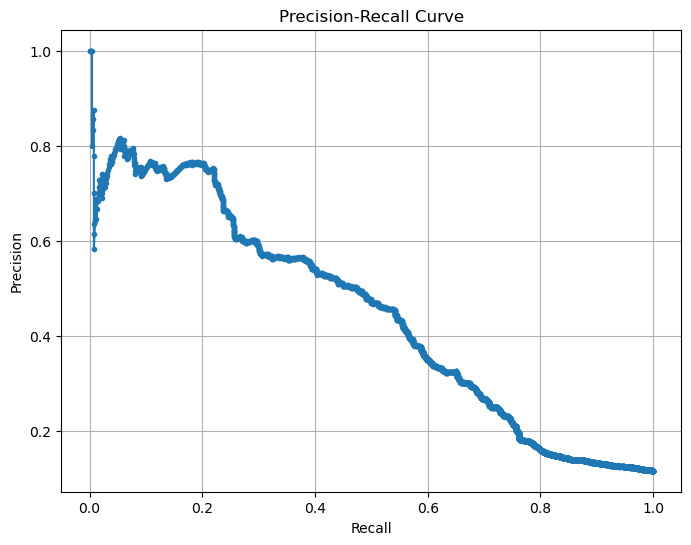

In [15]:
#time to adjust the classification threshold
import numpy as np
import matplotlib.pyplot as plt
# --- IGNORE ---
# Calculate precision and recall for different thresholds
from sklearn.metrics import precision_recall_curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, marker = '.')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title('Precision-Recall Curve')
plt.grid()

# Precision vs Recall in the Bank Marketing Project

## 🔹 Precision
- Precision = Of all the customers the model predicts will subscribe, how many actually do?
- High precision means fewer wasted marketing calls (fewer false positives).
- Low precision means many customers predicted as subscribers won’t actually subscribe.

## 🔹 Recall
- Recall = Of all the customers who actually subscribe, how many did the model correctly identify?
- High recall means the model captures most potential subscribers (few false negatives).
- Low recall means the bank misses many customers who would have subscribed.

---

## 🔹 Which Matters More Here?
For the bank marketing problem:
- **False Positives (FP):** Wasted calls/resources, but the bank simply spends a little extra time contacting uninterested customers.
- **False Negatives (FN):** Lost revenue opportunities, because the bank fails to contact a customer who would have subscribed.

Since **missing actual subscribers (FN)** is worse than calling uninterested ones (FP), **recall is more important than precision** for this project.

---

## 🔹 Next Step: Threshold Adjustment
- By default, Logistic Regression uses a **0.5 threshold**: predict "yes" if probability ≥ 0.5.
- At 0.5, the model has **moderate recall (~71%) but low precision (~26%)**.
- To **increase recall further**, the next step is to **lower the threshold to 0.3**:
  - This makes the model more "generous" in predicting positives.
  - More actual subscribers will be caught (higher recall).
  - Precision will likely decrease, but that trade-off is acceptable here.

---

✅ **Summary**:  
In this project, recall is the priority. The next step is to compare performance at **threshold = 0.3 vs threshold = 0.5** to maximize recall while monitoring precision. This ensures the model finds as many potential subscribers as possible, even if it means contacting more uninterested customers.
